# Design Codes

In [1]:
from concreteproperties.design_codes import AS3600
from concreteproperties.stress_strain_profile import (
    EurocodeParabolicUltimate,
    BilinearStressStrain,
)
from sectionproperties.pre.library.primitive_sections import (
    rectangular_section,
    circular_section,
)
from concreteproperties.pre import add_bar_rectangular_array
from concreteproperties.concrete_section import ConcreteSection
from concreteproperties.results import MomentInteractionResults

%config InlineBackend.figure_formats = ['svg']

In [2]:
design_code = AS3600()
concrete = design_code.create_concrete_material(compressive_strength=40)
steel = design_code.create_steel_material()

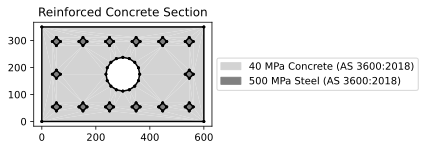

In [3]:
col = rectangular_section(d=350, b=600, material=concrete)
void = circular_section(d=125, n=16).align_center(align_to=col)
col = col - void  # subtract void from column

# add bars to column
geom = add_bar_rectangular_array(
    geometry=col,
    area=450,
    material=steel,
    n_x=6,
    x_s=492 / 5,
    n_y=3,
    y_s=121,
    anchor=(54, 54),
    exterior_only=True,
)

conc_sec = ConcreteSection(geom)
conc_sec.plot_section()
design_code.assign_concrete_section(concrete_section=conc_sec)

In [11]:
fmi, mi = design_code.moment_interaction_diagram(n_points=50)

Output()

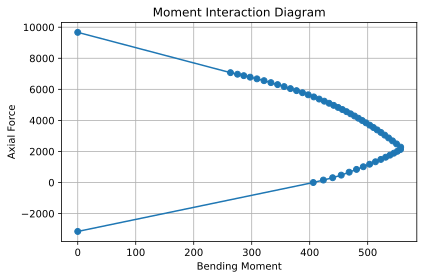

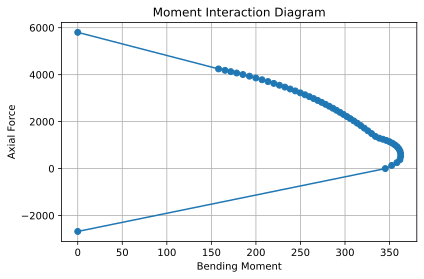

<AxesSubplot:title={'center':'Moment Interaction Diagram'}, xlabel='Bending Moment', ylabel='Axial Force'>

In [12]:
mi.plot_diagram()
fmi.plot_diagram()

In [7]:
concrete.ultimate_stress_strain_profile = EurocodeParabolicUltimate(
    compressive_strength=0.9 * 40,
    compressive_strain=0.0015,
    ultimate_strain=0.003,
    n=2,
)

In [ ]:
fmi_ec, mi_ec = design_code.moment_interaction_diagram(n_points=50)

Output()

In [54]:
concrete.ultimate_stress_strain_profile = BilinearStressStrain(
    compressive_strength=0.9 * 40,
    compressive_strain=0.0015,
    ultimate_strain=0.003,
)

In [55]:
fmi_bi, mi_bi = design_code.moment_interaction_diagram(n_points=50)

Output()

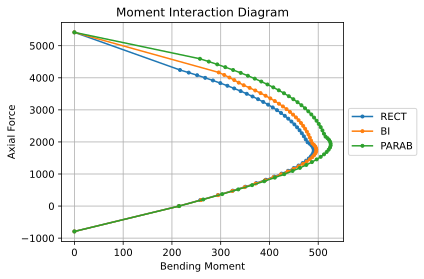

<AxesSubplot:title={'center':'Moment Interaction Diagram'}, xlabel='Bending Moment', ylabel='Axial Force'>

In [56]:
MomentInteractionResults.plot_multiple_diagrams(
    [fmi, fmi_bi, fmi_ec], ["RECT", "BI", "PARAB"]
)

In [8]:
fbb, bb, phi = design_code.biaxial_bending_diagram(n=0000e3, n_points=24)

Output()

0.85


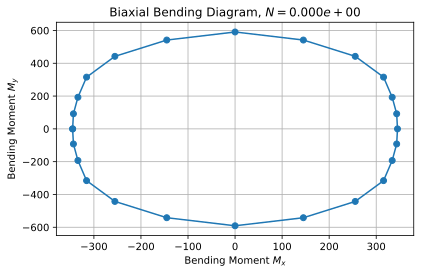

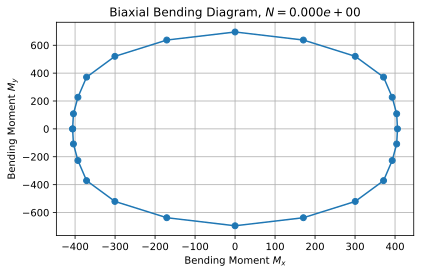

<AxesSubplot:title={'center':'Biaxial Bending Diagram, $N = 0.000e+00$'}, xlabel='Bending Moment $M_x$', ylabel='Bending Moment $M_y$'>

In [9]:
print(phi)
fbb.plot_diagram()
bb.plot_diagram()

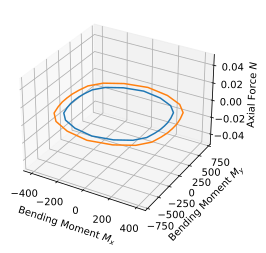

<Axes3DSubplot:xlabel='Bending Moment $M_x$', ylabel='Bending Moment $M_y$'>

In [10]:
bb.plot_multiple_diagrams([fbb, bb])